
**Color Transformation**




In [1]:
!pip install numpy
!pip install scipy
!pip install scikit-image
!pip install opencv-python-headless  # opencv-python-headless is a non-GUI version of OpenCV
!pip install mahotas
!pip install matplotlib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 1.7 MB/s eta 0:00:00


In [2]:
import numpy as np
import scipy
import skimage
import cv2
import mahotas
import matplotlib.pyplot as plt
print("All libraries are successfully imported!")


All libraries are successfully imported!


In [3]:
import numpy as np
from skimage.io import imread
from skimage.color import rgb2lab, lab2rgb
import matplotlib.pyplot as plt


In [5]:
im = imread('/content/TechSmith-Blog-JPGvsPNG.png')
im1 = rgb2lab(im)

In [7]:
im1[...,1] = im1[...,2] = 0

In [8]:
im1 = lab2rgb(im1)

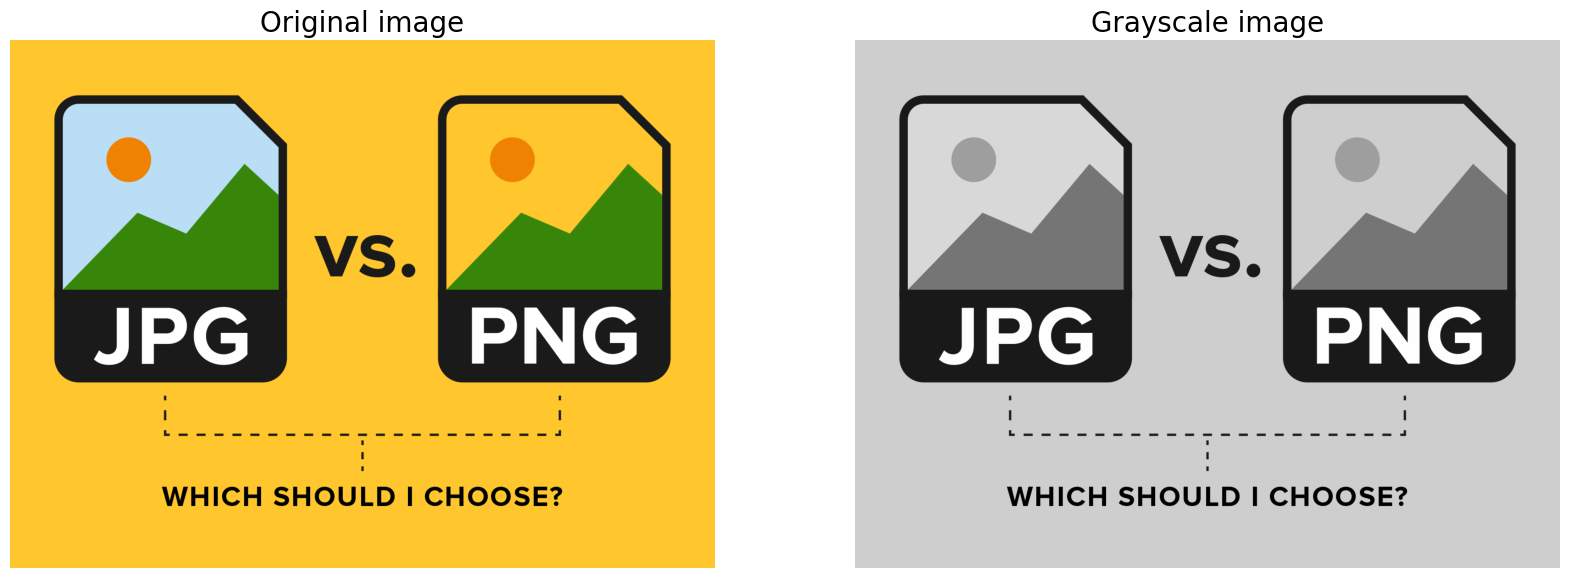

In [9]:
plt.figure(figsize=(20,10))
plt.subplot(121), plt.imshow(im), plt.axis('off'), plt.title('Original image', size=20)
plt.subplot(122), plt.imshow(im1), plt.axis('off'), plt.title('Grayscale image', size=20)
plt.show()


In [10]:
im1 = rgb2lab(im)  # The rgb2lab() function is utilized to convert the RGB image into the Lab color space, separating luminosity from color.

In [11]:
im1[...,0] = im1[...,0] + 50

In [12]:
im1 = lab2rgb(im1)

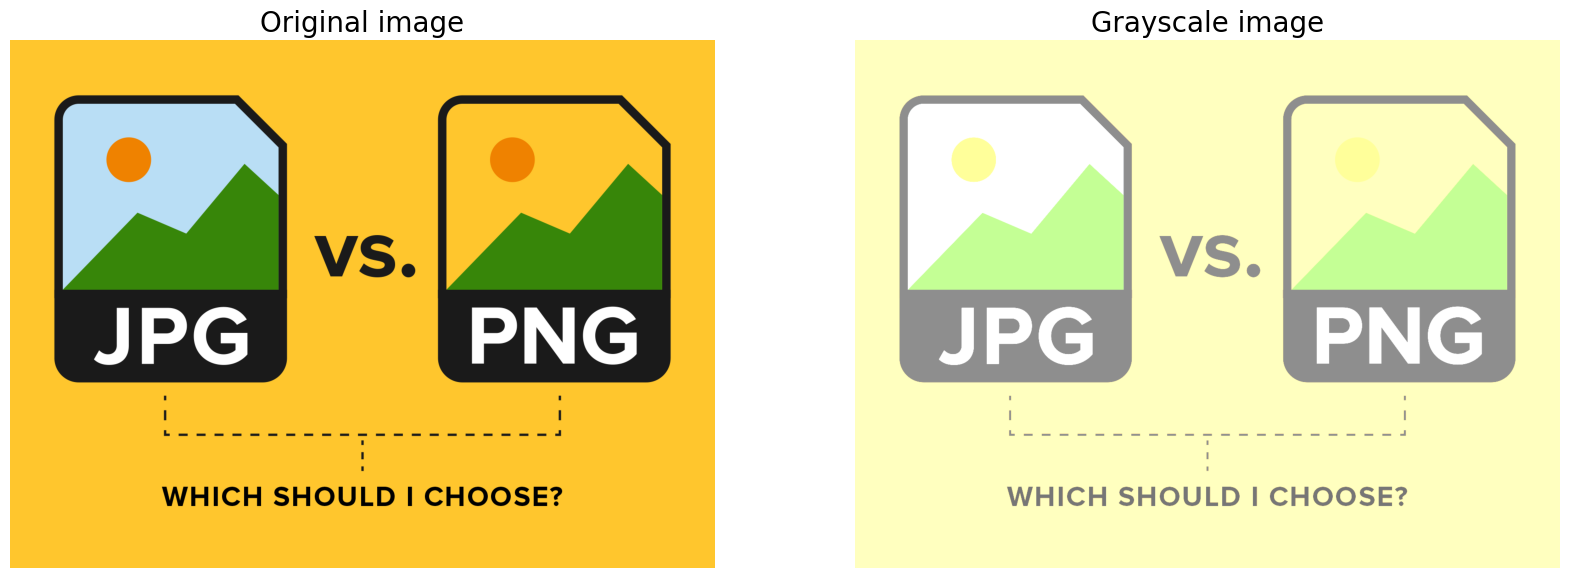

In [13]:
plt.figure(figsize=(20,10))
plt.subplot(121), plt.imshow(im), plt.axis('off'), plt.title('Original image', size=20)
plt.subplot(122), plt.imshow(im1), plt.axis('off'), plt.title('Grayscale image', size=20)
plt.show()

In [14]:
im1 = rgb2lab(im)
im1[...,0] = np.max(im1[...,0]) - im1[...,0]  # Invert the luminosity channel
im1 = lab2rgb(im1)


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:394: UserWarning: Color data out of range: Z < 0 in 1226049 pixels
  return func(*args, **kwargs)


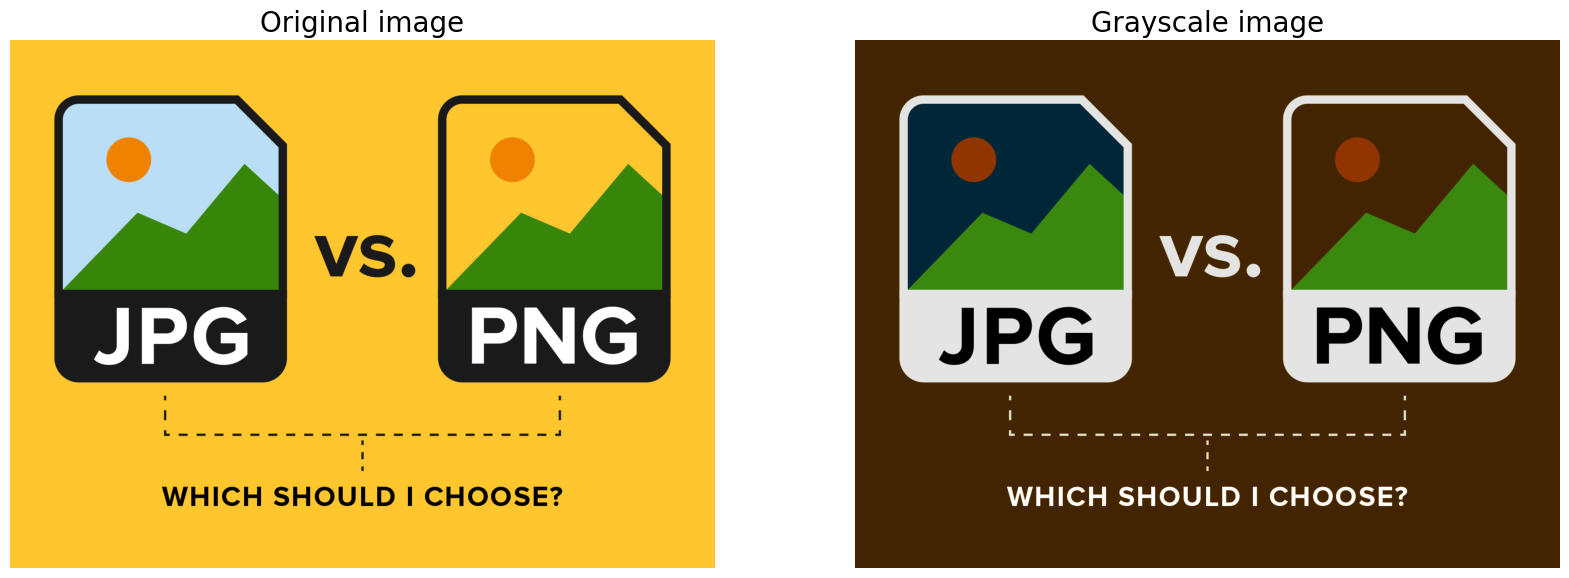

In [15]:
plt.figure(figsize=(20,10))
plt.subplot(121), plt.imshow(im), plt.axis('off'), plt.title('Original image', size=20)
plt.subplot(122), plt.imshow(im1), plt.axis('off'), plt.title('Grayscale image', size=20)
plt.show()

**Affine Transformations**

In [22]:
import numpy as np
from scipy import ndimage as ndi
from skimage.io import imread
from skimage.color import rgb2gray



In [38]:
img = rgb2gray(imread('/content/TechSmith-Blog-JPGvsPNG.png'))
w, h = img.shape
# Initialize a list to hold the transformed images
transformed_images = []
labels = []

# Original Image
transformed_images.append(img)
labels.append('0. Original')

In [39]:
mat_identity = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
img1 = ndi.affine_transform(img, mat_identity)
mat_identity = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
img1 = ndi.affine_transform(img, mat_identity)
transformed_images.append(img1)
labels.append('1.	Apply Identity Transform')

In [40]:
mat_reflect = np.array([[1, 0, 0], [0, -1, 0], [0, 0, 1]]) @ np.array([[1, 0, 0], [0, 1, -h], [0, 0, 1]])
img2 = ndi.affine_transform(img, mat_reflect)  # offset=(0, h)
transformed_images.append(img2)
labels.append('2.	Reflection Transform ')


In [42]:
s_x, s_y = 0.75, 1.25
mat_scale = np.array([[s_x, 0, 0], [0, s_y, 0], [0, 0, 1]])
img3 = ndi.affine_transform(img, mat_scale)
transformed_images.append(img3)
labels.append('3.	Scale the Image')


In [43]:
theta = np.pi / 6  # 30 degrees in radians
mat_rotate = np.array([[1, 0, w/2], [0, 1, h/2], [0, 0, 1]]) @ np.array([[np.cos(theta), np.sin(theta), 0], [-np.sin(theta), np.cos(theta), 0], [0, 0, 1]]) @ np.array([[1, 0, -w/2], [0, 1, -h/2], [0, 0, 1]])
img4 = ndi.affine_transform(img1, mat_rotate)
transformed_images.append(img4)
labels.append('4. Rotate the Image ')

In [45]:
lambda1 = 0.5
mat_shear = np.array([[1, lambda1, 0], [lambda1, 1, 0], [0, 0, 1]])
img5 = ndi.affine_transform(img1, mat_shear)
transformed_images.append(img5)
labels.append('5. Rotate the Image ')

In [46]:
mat_all = mat_identity @ mat_reflect @ mat_scale @ mat_rotate @ mat_shear
img_final = ndi.affine_transform(img, mat_all)
transformed_images.append(img_final)
labels.append('6.	Combine All Transforms ')

<ipython-input-49-ea9795e56cec>:7: UserWarning: Glyph 9 (	) missing from current font.
  plt.tight_layout()


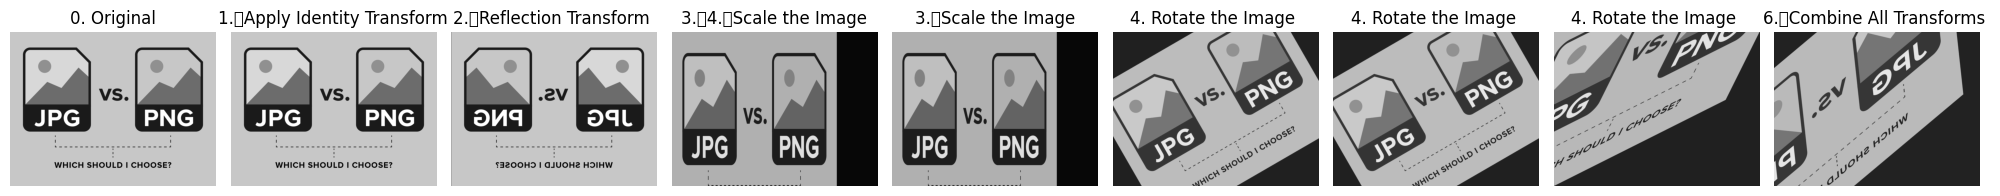

In [49]:
fig, axes = plt.subplots(1, len(transformed_images), figsize=(20, 10))
for ax, image, label in zip(axes, transformed_images, labels):
    ax.imshow(image, cmap='gray')
    ax.set_title(label)
    ax.axis('off')

plt.tight_layout()
plt.show()

**Perspective Transfomraiton**

In [51]:
from skimage.transform import ProjectiveTransform, warp
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt

In [50]:
im_src = imread('/content/animal.png')
height, width, dim = im_src.shape
im_dst = np.zeros((height, width, dim))

In [52]:
pt = ProjectiveTransform()

In [53]:
src = np.array([[295., 174.], [540., 146.], [400., 777.], [60., 422.]])
dst = np.array([[0., 0.], [height-1, 0.], [height-1, width-1], [0., width-1]])
pt.estimate(src, dst)


True

In [54]:
im_dst = warp(im_src, pt, output_shape=(height, width))

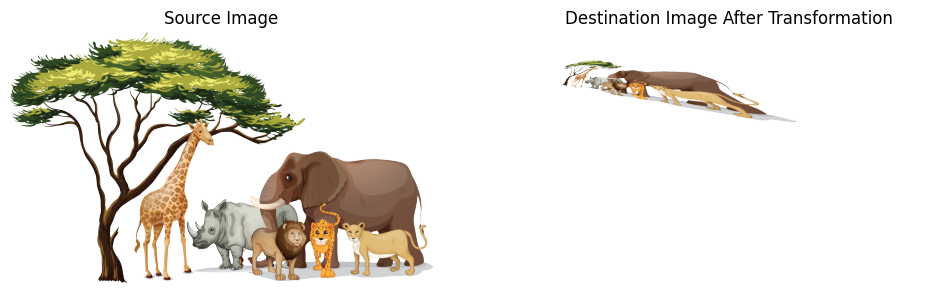

In [55]:
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(im_src)
plt.title('Source Image')
plt.axis('off')

plt.subplot(122)
plt.imshow(im_dst)
plt.title('Destination Image After Transformation')
plt.axis('off')

plt.show()
